In [ ]:
import requests
import pandas as pd

In [ ]:
import time
import tqdm  # $

In [ ]:
from tqdm import tqdm


number_of_pages = 10
jobin = input()
job_title = [jobin]
for job in job_title:
    data=[]
    for i in tqdm(range(number_of_pages)):
        url = 'https://api.hh.ru/vacancies'
        par = {'text': job, 'area':'1','per_page':'100', 'page':i}
        r = requests.get(url, params=par)
        e=r.json()
        data.append(e)
        vacancy_details = data[0]['items'][0].keys()
        df = pd.DataFrame(columns= list(vacancy_details))
        ind = 0
        for i in range(len(data)):
            for j in range(len(data[i]['items'])):
                df.loc[ind] = data[i]['items'][j]
                ind+=1
    csv_name = job+".csv"
    df.to_csv(csv_name)




финансовый аналитик


100%|██████████| 10/10 [01:18<00:00,  7.80s/it]


In [ ]:
print(csv_name)

финансовый аналитик.csv


In [ ]:
df = pd.read_csv(csv_name)
df.head(2)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context
0,0,90095741,False,Финансовый директор,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '135', 'name': 'Финансовый директор (C...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN
1,1,90108887,False,Начальник планово-экономического департамента,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],False,"[{'id': '142', 'name': 'Экономист'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN


In [ ]:
import ast # run code from string for example ast.literal_eval("1+1")

salaries = df.salary.dropna() # remove all NA's from dataframe
currencies = [ast.literal_eval(salaries.iloc[i])['currency'] for i in range(len(salaries))]
curr = set(currencies) #{'EUR', 'RUR', 'USD'}

#divide dataframe salararies by currency
rur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='RUR']
eur = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='EUR']
usd = [ast.literal_eval(salaries.iloc[i]) for i in range(len(salaries)) if ast.literal_eval(salaries.iloc[i])['currency']=='USD']

In [ ]:
fr = [x['from'] for x in rur] # lower range of salary
#fr = list(filter(lambda x: x is not None, fr)) # remove NA's from lower range [0, 100, 200,...]

to = [x['to'] for x in rur] #upper range of salary
#to = list(filter(lambda x: x is not None, to)) #remove NA's from upper range [100, 200, 300,...]

import numpy as np
salary_range = list(zip(fr, to)) # concatenate upper and lower range  [(0,100), (100, 200), (200, 300)...]
#av = map(np.mean, salary_range) # convert [(0,100), (100, 200), (200, 300)...] to [50, 150, 250,...]
#av = round(np.mean(list(av)),1) # average value from [50, 150, 250,...]

#print("average salary", av, "rubles")
data_salary = []

for i in range(len(salary_range)):
    salary_range[i] = list(salary_range[i])
    salary_range[i][0] = str(salary_range[i][0])
    salary_range[i][1] = str(salary_range[i][1])
    salary_range[i] = list(salary_range[i])
    if salary_range[i][0] == "None":
        salary_range[i][0] = salary_range[i][1]
    if salary_range[i][1] == "None":
        salary_range[i][1] = salary_range[i][0]
    data_salary.append(int((int(salary_range[i][0])+int(salary_range[i][1]))/2))
    #print(salary_range[i][0], salary_range[i][1])
    cc2 = 0
    cc3 = 0
    for i in range(len(data_salary)):
        cc2 += data_salary[i]
        cc3 += 1
    ccres = int(cc2/cc3)
print(salary_range)
print(data_salary)
print(ccres)
len(salary_range)

[['300000', '300000'], ['300000', '350000'], ['200000', '200000'], ['500000', '750000'], ['50000', '70000'], ['250000', '450000'], ['200000', '200000'], ['300000', '300000'], ['350000', '350000'], ['200000', '200000'], ['100000', '100000'], ['200000', '250000'], ['150000', '150000'], ['65000', '65000'], ['140000', '140000'], ['70000', '70000'], ['100000', '130000'], ['200000', '200000'], ['120000', '120000'], ['35000', '45000'], ['75000', '75000'], ['170000', '285000'], ['200000', '200000'], ['16000', '16000'], ['150000', '150000'], ['130000', '180000'], ['100000', '150000'], ['120000', '120000'], ['80000', '140000'], ['50000', '150000'], ['260000', '260000'], ['50000', '50000'], ['135000', '150000'], ['100000', '100000'], ['80000', '100000'], ['180000', '180000'], ['250000', '250000'], ['200000', '300000'], ['55000', '55000'], ['250000', '250000'], ['130000', '130000'], ['100000', '120000'], ['100000', '200000'], ['70000', '100000'], ['45000', '45000'], ['174000', '174000'], ['130000'

401

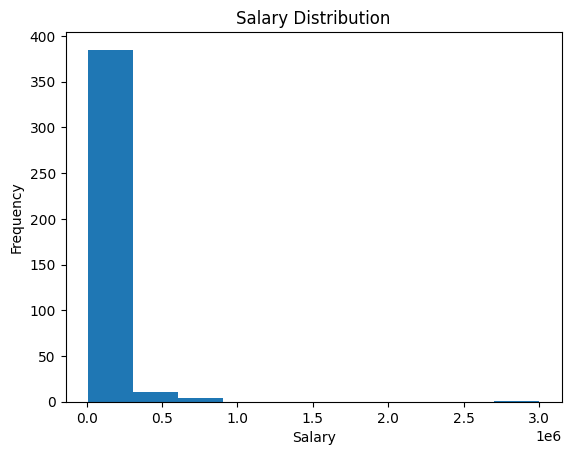

In [ ]:
import matplotlib.pyplot as plt

#DATA_SALARY = [135000, 70000, 115000, 140000, 130000, 150000, 110000, 110000, 110000, 70000, 67500, 65000, 74000, 60000, 260000, 200000, 350000, 200000, 260000, 120000, 60000, 130000, 100000, 80000, 80000]

# plot histogram of salaries
plt.hist(data_salary, bins=10)

# plot average salary as a vertical line
##avg_salary = sum(data_salary) / len(data_salary)
##plt.axvline(x=avg_salary, color='r', linestyle='--')

# set x and y labels
plt.xlabel('Salary')
plt.ylabel('Frequency')

# set title
plt.title('Salary Distribution')

# show plot
plt.show()

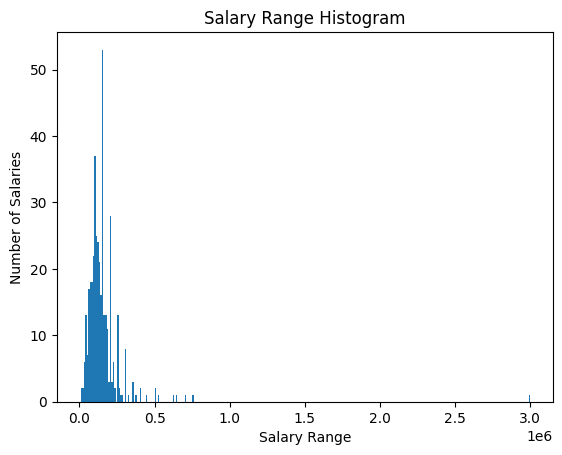

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, max(data_salary)+10000, 10000)

# plot histogram
plt.hist(data_salary, bins=bins)

# set x and y labels
plt.xlabel('Salary Range')
plt.ylabel('Number of Salaries')

# set title
plt.title('Salary Range Histogram')

# show plot
plt.show()

In [ ]:
#print(len(list(df.snippet)))
sw221 = []
for i in range (10): #(len(list(df.snippet))):
    sw222 = list(df.snippet)[i].split("<highlighttext>")
    for j in range (len(list(sw222))):
        sw223 = sw222[j].split("</highlighttext>")
        for k in range(len(list(sw223))):
            if 'финансо' in sw223[k]:
                print(sw223[k])
                #sw221.append(sw223[k])
#sw222[2].split("</highlighttext>")


финансового
{'requirement': 'Высшее образование (экономика, финансы ). Опыт работы от 3 лет на аналогичной должности в холдинговой структуре. Знание принципов бухгалтерского/налогового и...', 'responsibility': '...БДР и БДДС. Взаимодействие со структурными подразделениями Компании по вопросам: формирования планов, анализа себестоимости, финансового результата. Расчет показателей 
финансового
{'requirement': 'Высшее экономическое образование. Релевантный опыт работы от 5 лет на аналогичной должности. MS Office, отличное знание "1С" УПП, "БитФинанс". ', 'responsibility': 'Формирование БДР, БДДС на год, с аналитикой на месяц. Сбор, анализ консолидация данных управленческого учета. Анализ финансово-экономической деятельности компании. '}
финансового
. Знание основ бюджетирования, бухгалтерского и управленческого учета. Чтение и анализ основных форм финансовой и операционной отчетности. ', 'responsibility': '
финансовой
 отчетности компании и активов: P&L, balance sheet, cash flow. Контроль

In [ ]:
stopwords2 = {"{'requirement':", "highlighttext", "и", "requirement'", "responsibility'", "работы"}
stopwords = set.union(stopwords2, set(sw221))
stopwords = stopwords2

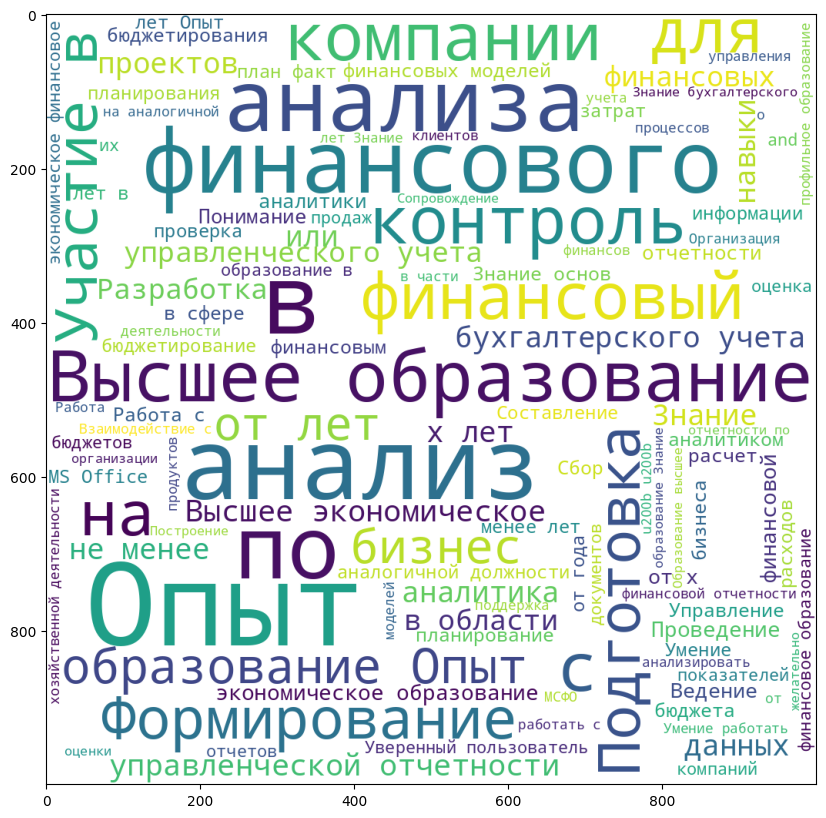

In [ ]:
from collections import Counter

vacancy_names = df.snippet # change here to change source of data/words etc
cloud = Counter(vacancy_names)
from wordcloud import WordCloud, STOPWORDS
#stopwords = {"{'requirement':", "highlighttext", "и", "requirement'", "responsibility'", "работы"}
cloud = ''
for x in list(vacancy_names):
    cloud+=x+' '
wordcloud = WordCloud(width = 1000, height = 1000,

                stopwords = stopwords,
                min_font_size = 16, max_font_size = 150, background_color='white'
                     ).generate(cloud)

import matplotlib.pylab as plt
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.savefig('vacancy_cloud.png')